In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import datetime

In [78]:
os.chdir('../csv_files/')

In [79]:
file_list = os.listdir('./')
for file in file_list:
    if '~' in file:
        file_list.remove(file)    

In [80]:
data = pd.read_csv('rsjt2.csv',  skiprows=range(1, 2))

In [81]:
data.dtypes


#YY       int64
MM        int64
DD        int64
hh        int64
mm        int64
WDIR      int64
WSPD    float64
GST     float64
WVHT    float64
DPD     float64
APD     float64
MWD       int64
PRES    float64
ATMP    float64
WTMP    float64
DEWP    float64
VIS     float64
TIDE    float64
dtype: object

In [82]:
data.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2017,1,1,0,6,82,3.4,4.2,99.0,99.0,99.0,999,1008.7,19.1,18.2,999.0,99.0,99.0
1,2017,1,1,0,12,78,3.0,4.0,99.0,99.0,99.0,999,1008.7,19.1,18.3,999.0,99.0,99.0
2,2017,1,1,0,18,78,3.7,4.2,99.0,99.0,99.0,999,1008.7,19.0,18.3,999.0,99.0,99.0
3,2017,1,1,0,24,78,3.5,4.5,99.0,99.0,99.0,999,1008.8,18.8,18.3,999.0,99.0,99.0
4,2017,1,1,0,30,79,3.3,4.3,99.0,99.0,99.0,999,1008.8,18.7,18.2,999.0,99.0,99.0


In [83]:
data

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2017,1,1,0,6,82,3.4,4.2,99.0,99.0,99.0,999,1008.7,19.1,18.2,999.0,99.0,99.0
1,2017,1,1,0,12,78,3.0,4.0,99.0,99.0,99.0,999,1008.7,19.1,18.3,999.0,99.0,99.0
2,2017,1,1,0,18,78,3.7,4.2,99.0,99.0,99.0,999,1008.7,19.0,18.3,999.0,99.0,99.0
3,2017,1,1,0,24,78,3.5,4.5,99.0,99.0,99.0,999,1008.8,18.8,18.3,999.0,99.0,99.0
4,2017,1,1,0,30,79,3.3,4.3,99.0,99.0,99.0,999,1008.8,18.7,18.2,999.0,99.0,99.0
5,2017,1,1,0,36,81,3.6,4.2,99.0,99.0,99.0,999,1009.0,18.7,18.3,999.0,99.0,99.0
6,2017,1,1,0,42,80,3.3,3.7,99.0,99.0,99.0,999,1009.0,18.7,18.3,999.0,99.0,99.0
7,2017,1,1,0,48,82,3.1,3.9,99.0,99.0,99.0,999,1009.0,18.8,18.3,999.0,99.0,99.0
8,2017,1,1,0,54,77,2.7,3.5,99.0,99.0,99.0,999,9999.0,18.7,18.4,999.0,99.0,99.0
9,2017,1,1,1,0,72,2.8,3.3,99.0,99.0,99.0,999,9999.0,18.8,18.3,999.0,99.0,99.0


In [174]:
print (data.shape)
#test_attrs = ['WVHT','DPD','APD','MWD','DEWP','VIS','TIDE']
attrs = data.columns
null_list = [99.0,999.0,99,999,9999.0,9999]
drop_list = list()
for attr in attrs: 
    null_sum = (data[attr].isin(null_list)).sum()
    print (attr,' : ', null_sum)
    if null_sum > 0.5*data.shape[0]:
        drop_list.append(attr)

(86909, 12)
#YY  :  0
MM  :  0
DD  :  0
hh  :  0
mm  :  0
WDIR  :  230
WSPD  :  572
GST  :  572
PRES  :  562
ATMP  :  1948
WTMP  :  925
timestamp  :  0


In [92]:
print (drop_list)
data = data.drop(drop_list, axis=1)
print (data.columns)

['WVHT', 'DPD', 'APD', 'MWD', 'DEWP', 'VIS', 'TIDE']


ValueError: labels ['WVHT' 'DPD' 'APD' 'MWD' 'DEWP' 'VIS' 'TIDE'] not contained in axis

In [94]:
print (data)


        #YY  MM  DD  hh  mm  WDIR  WSPD   GST    PRES   ATMP  WTMP
0      2017   1   1   0   6    82   3.4   4.2  1008.7   19.1  18.2
1      2017   1   1   0  12    78   3.0   4.0  1008.7   19.1  18.3
2      2017   1   1   0  18    78   3.7   4.2  1008.7   19.0  18.3
3      2017   1   1   0  24    78   3.5   4.5  1008.8   18.8  18.3
4      2017   1   1   0  30    79   3.3   4.3  1008.8   18.7  18.2
5      2017   1   1   0  36    81   3.6   4.2  1009.0   18.7  18.3
6      2017   1   1   0  42    80   3.3   3.7  1009.0   18.7  18.3
7      2017   1   1   0  48    82   3.1   3.9  1009.0   18.8  18.3
8      2017   1   1   0  54    77   2.7   3.5  9999.0   18.7  18.4
9      2017   1   1   1   0    72   2.8   3.3  9999.0   18.8  18.3
10     2017   1   1   1   6    74   2.5   3.2  1009.3   18.7  18.4
11     2017   1   1   1  12    72   2.6   3.2  1009.3   18.7  18.3
12     2017   1   1   1  18    64   3.0   3.5  1009.4   18.7  18.3
13     2017   1   1   1  24    60   2.4   3.3  1009.6   18.6  

In [105]:
with  pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print ((data['WTMP']))

0         18.2
1         18.3
2         18.3
3         18.3
4         18.2
5         18.3
6         18.3
7         18.3
8         18.4
9         18.3
10        18.4
11        18.3
12        18.3
13        18.3
14        18.2
15        18.2
16        18.2
17        18.2
18        18.2
19        18.2
20        18.2
21        18.1
22        18.1
23        18.1
24        18.1
25        18.1
26        18.0
27        18.0
28        18.0
29        18.0
30        18.0
31        18.0
32        18.0
33        18.0
34        18.0
35        18.0
36        18.0
37        18.1
38        18.1
39        18.1
40        18.1
41        18.1
42        18.1
43        18.1
44        18.1
45        18.1
46        18.0
47        18.0
48        18.0
49        18.0
50        18.0
51        17.9
52        17.9
53        17.9
54        18.0
55        18.0
56        18.0
57        18.0
58        18.0
59        18.0
60        18.0
61        18.0
62        18.0
63        18.0
64        18.0
65        18.0
66        

In [114]:
attrs = data.columns[:5]
print (attrs)

Index(['#YY', 'MM', 'DD', 'hh', 'mm'], dtype='object')


In [145]:
for attr in  attrs:
    print (attr)    
    data[attr] = data[attr].astype(str)
    """    vals = data[attr].values
    for val in vals:
        print (val.zfill(2))
        break"""
    data[attr] = data[attr].str.zfill(2)
    print (data[attr])

#YY
0        2017
1        2017
2        2017
3        2017
4        2017
5        2017
6        2017
7        2017
8        2017
9        2017
10       2017
11       2017
12       2017
13       2017
14       2017
15       2017
16       2017
17       2017
18       2017
19       2017
20       2017
21       2017
22       2017
23       2017
24       2017
25       2017
26       2017
27       2017
28       2017
29       2017
         ... 
86879    2017
86880    2017
86881    2017
86882    2017
86883    2017
86884    2017
86885    2017
86886    2017
86887    2017
86888    2017
86889    2017
86890    2017
86891    2017
86892    2017
86893    2017
86894    2017
86895    2017
86896    2017
86897    2017
86898    2017
86899    2017
86900    2017
86901    2017
86902    2017
86903    2017
86904    2017
86905    2017
86906    2017
86907    2017
86908    2017
Name: #YY, Length: 86909, dtype: object
MM
0        01
1        01
2        01
3        01
4        01
5        01
6        01
7        01
8  

In [155]:
data['timestamp'] = data['#YY'] + '/' + data['MM'] + '/' + data['DD'] + ':' + data['hh'] + ':' + data['mm']
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y/%m/%d:%H:%M')
data['timestamp']

0       2017-01-01 00:06:00
1       2017-01-01 00:12:00
2       2017-01-01 00:18:00
3       2017-01-01 00:24:00
4       2017-01-01 00:30:00
5       2017-01-01 00:36:00
6       2017-01-01 00:42:00
7       2017-01-01 00:48:00
8       2017-01-01 00:54:00
9       2017-01-01 01:00:00
10      2017-01-01 01:06:00
11      2017-01-01 01:12:00
12      2017-01-01 01:18:00
13      2017-01-01 01:24:00
14      2017-01-01 01:30:00
15      2017-01-01 01:36:00
16      2017-01-01 01:42:00
17      2017-01-01 01:48:00
18      2017-01-01 01:54:00
19      2017-01-01 02:00:00
20      2017-01-01 02:06:00
21      2017-01-01 02:12:00
22      2017-01-01 02:18:00
23      2017-01-01 02:24:00
24      2017-01-01 02:30:00
25      2017-01-01 02:36:00
26      2017-01-01 02:42:00
27      2017-01-01 02:48:00
28      2017-01-01 02:54:00
29      2017-01-01 03:00:00
                ...        
86879   2017-12-31 21:00:00
86880   2017-12-31 21:06:00
86881   2017-12-31 21:12:00
86882   2017-12-31 21:18:00
86883   2017-12-31 2

In [160]:
ind = pd.Index(data['timestamp'])
ind
data.index = ind

In [182]:
data

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,PRES,ATMP,WTMP,timestamp
timestamp,,,,,,,,,,,,
2017-01-01 00:06:00,2017,01,01,00,06,82.0,3.4,4.2,1008.7,19.1,18.2,2017-01-01 00:06:00
2017-01-01 00:12:00,2017,01,01,00,12,78.0,3.0,4.0,1008.7,19.1,18.3,2017-01-01 00:12:00
2017-01-01 00:18:00,2017,01,01,00,18,78.0,3.7,4.2,1008.7,19.0,18.3,2017-01-01 00:18:00
2017-01-01 00:24:00,2017,01,01,00,24,78.0,3.5,4.5,1008.8,18.8,18.3,2017-01-01 00:24:00
2017-01-01 00:30:00,2017,01,01,00,30,79.0,3.3,4.3,1008.8,18.7,18.2,2017-01-01 00:30:00
2017-01-01 00:36:00,2017,01,01,00,36,81.0,3.6,4.2,1009.0,18.7,18.3,2017-01-01 00:36:00
2017-01-01 00:42:00,2017,01,01,00,42,80.0,3.3,3.7,1009.0,18.7,18.3,2017-01-01 00:42:00
2017-01-01 00:48:00,2017,01,01,00,48,82.0,3.1,3.9,1009.0,18.8,18.3,2017-01-01 00:48:00
2017-01-01 00:54:00,2017,01,01,00,54,77.0,2.7,3.5,9999.0,18.7,18.4,2017-01-01 00:54:00


In [198]:
data.WDIR = data.WDIR.replace(999,np.nan)
data.WSPD = data.WSPD.replace(99.0, np.nan)
data.GST = data.GST.replace(99.0, np.nan)
data.PRES = data.PRES.replace(9999.0, np.nan)
data.WTMP = data.WTMP.replace(999.0, np.nan)
data.ATMP = data.ATMP.replace(999.0, np.nan)

In [205]:
def check_null():
    print(data.WTMP.isnull().sum())
    print(data.ATMP.isnull().sum())
    print(data.GST.isnull().sum())
    print(data.WDIR.isnull().sum())
    print(data.WSPD.isnull().sum())
#data.ATMP.max()

In [209]:
data = data.fillna(method="ffill")
check_null()

0
0
0
0
0


In [216]:
sample = data[0:239]
sample = sample.drop(['#YY', 'MM','DD', 'hh', 'mm', 'timestamp'], axis = 1)

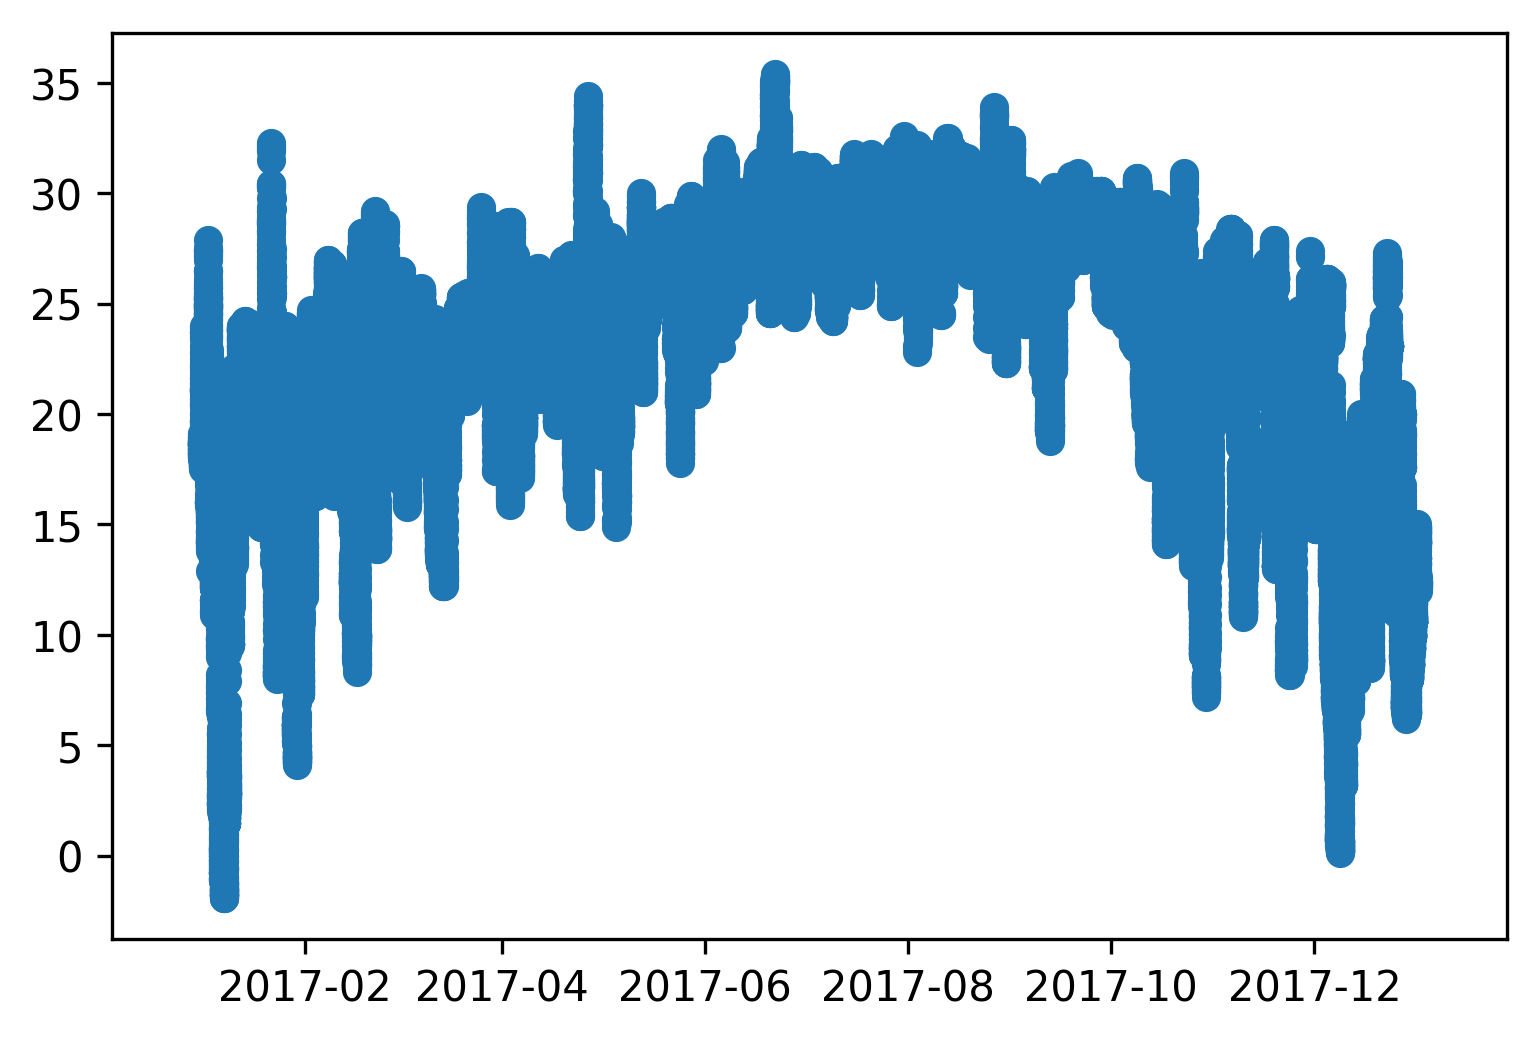

In [226]:
X = sample.index.values
Y = sample.ATMP.values
%matplotlib inline
plt.figure(dpi=300)
plt.scatter(X, Y)

In [227]:
sample.resample('60T').mean()

,WDIR,WSPD,GST,PRES,ATMP,WTMP
timestamp,,,,,,
2017-01-01 00:00:00,79.444444,3.288889,4.055556,1008.855556,18.844444,18.288889
2017-01-01 01:00:00,67.500000,2.550000,3.070000,1009.480000,18.650000,18.260000
2017-01-01 02:00:00,52.100000,2.390000,2.830000,1009.970000,18.360000,18.090000
2017-01-01 03:00:00,66.300000,2.140000,2.430000,1009.910000,18.210000,18.020000
2017-01-01 04:00:00,133.600000,1.280000,1.480000,1009.980000,18.850000,18.070000
2017-01-01 05:00:00,190.100000,0.980000,1.240000,1009.910000,18.370000,17.970000
2017-01-01 06:00:00,117.300000,1.010000,1.240000,1009.590000,18.240000,18.000000
2017-01-01 07:00:00,174.900000,1.100000,1.240000,1010.090000,17.840000,17.900000
2017-01-01 08:00:00,305.300000,2.180000,2.600000,1010.670000,17.670000,17.850000


In [230]:
R_data = data.drop(['#YY', 'MM','DD', 'hh', 'mm', 'timestamp'], axis = 1)
R_data = R_data.resample('60T').mean()
R_data

,WDIR,WSPD,GST,PRES,ATMP,WTMP
timestamp,,,,,,
2017-01-01 00:00:00,79.444444,3.288889,4.055556,1008.855556,18.844444,18.288889
2017-01-01 01:00:00,67.500000,2.550000,3.070000,1009.480000,18.650000,18.260000
2017-01-01 02:00:00,52.100000,2.390000,2.830000,1009.970000,18.360000,18.090000
2017-01-01 03:00:00,66.300000,2.140000,2.430000,1009.910000,18.210000,18.020000
2017-01-01 04:00:00,133.600000,1.280000,1.480000,1009.980000,18.850000,18.070000
2017-01-01 05:00:00,190.100000,0.980000,1.240000,1009.910000,18.370000,17.970000
2017-01-01 06:00:00,117.300000,1.010000,1.240000,1009.590000,18.240000,18.000000
2017-01-01 07:00:00,174.900000,1.100000,1.240000,1010.090000,17.840000,17.900000
2017-01-01 08:00:00,305.300000,2.180000,2.600000,1010.670000,17.670000,17.850000


In [235]:
content = R_data.to_csv()
with open('../preprocessed_data/cleaned_rsjt2.csv', 'w') as hand:
    hand.write(content)

In [237]:
data.WTMP

timestamp
2017-01-01 00:06:00    18.2
2017-01-01 00:12:00    18.3
2017-01-01 00:18:00    18.3
2017-01-01 00:24:00    18.3
2017-01-01 00:30:00    18.2
2017-01-01 00:36:00    18.3
2017-01-01 00:42:00    18.3
2017-01-01 00:48:00    18.3
2017-01-01 00:54:00    18.4
2017-01-01 01:00:00    18.3
2017-01-01 01:06:00    18.4
2017-01-01 01:12:00    18.3
2017-01-01 01:18:00    18.3
2017-01-01 01:24:00    18.3
2017-01-01 01:30:00    18.2
2017-01-01 01:36:00    18.2
2017-01-01 01:42:00    18.2
2017-01-01 01:48:00    18.2
2017-01-01 01:54:00    18.2
2017-01-01 02:00:00    18.2
2017-01-01 02:06:00    18.2
2017-01-01 02:12:00    18.1
2017-01-01 02:18:00    18.1
2017-01-01 02:24:00    18.1
2017-01-01 02:30:00    18.1
2017-01-01 02:36:00    18.1
2017-01-01 02:42:00    18.0
2017-01-01 02:48:00    18.0
2017-01-01 02:54:00    18.0
2017-01-01 03:00:00    18.0
                       ... 
2017-12-31 21:00:00    12.4
2017-12-31 21:06:00    12.4
2017-12-31 21:12:00    12.4
2017-12-31 21:18:00    12.4
2017-12-31

In [250]:
nl = os.listdir('../preprocessed_data/')
print(os.path.exists('../preprocessed_data/cleaned_srst2.csv'))
a = pd.read_csv('../preprocessed_data/cleaned_srst2.csv' )
for l in nl:
    col_list = pd.read_csv('../preprocessed_data/' + l).columns
    a = set(a).intersection(set(col_list))
    print (a)

True
{'timestamp', 'WDIR', 'PRES', 'ATMP', 'WSPD', 'DEWP', 'GST'}
{'ATMP', 'timestamp', 'PRES'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}
{'ATMP', 'timestamp'}


In [240]:
nl

['cleaned_srst2.csv',
 'cleaned_lcll1.csv',
 'cleaned_42020.csv',
 'cleaned_mgpt2.csv',
 'cleaned_hist2.csv',
 'cleaned_babt2.csv',
 'cleaned_irdt2.csv',
 'cleaned_sdrt2.csv',
 'cleaned_42043.csv',
 'cleaned_sgnt2.csv',
 'cleaned_rlit2.csv',
 'cleaned_awrt2.csv',
 'cleaned_rsjt2.csv',
 'cleaned_txpt2.csv',
 'cleaned_capl1.csv',
 'cleaned_42019.csv',
 'cleaned_rtat2.csv',
 'cleaned_emat2.csv',
 'cleaned_pmnt2.csv',
 'cleaned_vcat2.csv',
 'cleaned_rlot2.csv',
 'cleaned_pcnt2.csv',
 'cleaned_eptt2.csv',
 'cleaned_pact2.csv',
 'cleaned_ptit2.csv',
 'cleaned_luit2.csv',
 'cleaned_fcgt2.csv']